内容概要：
* 中心的衡量：均值、中位数
* 离散程度的衡量：方差、标准差、绝对中位差
* 分布的偏斜衡量：偏度、峰度

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from ggplot import mtcars
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
mtcars.index= mtcars['name']

In [3]:
mtcars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [4]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


# 中心的衡量、如何画垂线

In [5]:
norm_data = pd.DataFrame(np.random.normal(size=1000))

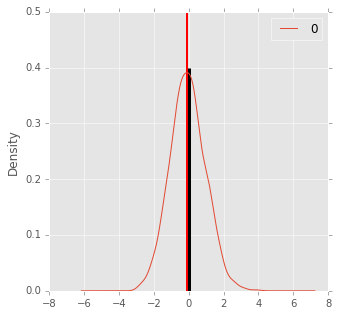

In [6]:
#比较均值和 中位数 的”位置“

norm_data.plot(kind='density',figsize=(5,5))  # figsize 的作用是调整图片显示比例，试删除、figsize=(10,10)，看看效果
plt.vlines(norm_data.mean(),ymin=0,ymax=0.4,linewidth=5) # plt.vlines 画垂线
plt.vlines(norm_data.median(),ymin=0,ymax=0.5,linewidth=2.0,color='red')

## 其他类型的图

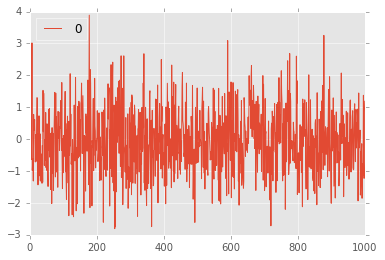

In [7]:
#norm_data.plot?
norm_data.plot(kind='line')

#  skewed distributions偏态分布

In [8]:
skew_data= pd.DataFrame(np.random.exponential(size=100000))

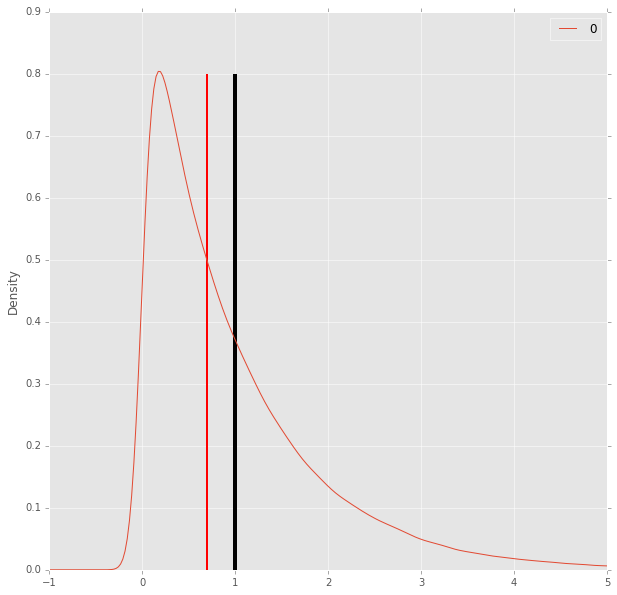

In [9]:
skew_data.plot(kind='density',
               figsize=(10,10),
               xlim=(-1,5))

plt.vlines(skew_data.mean(),
                 ymin=0,
                 ymax=0.8,
                 linewidth=4.0)

plt.vlines(skew_data.median(),
           ymin=0,
           ymax=0.8,
           color='red',
           linewidth=2.0)
# 均值受偏态分布牵离，中位数抵抗这种拉力

# Mesrues of Spread

Measures of spread (dispersion) are statistics that describe how data varies. 

While measures of center give us an idea of the typical value,

measures of spread give us a sense of 【how much the data tends to diverge from the typical value.】


## 五点概括法，箱线图

In [10]:
#极差
max(mtcars['mpg'])-min(mtcars['mpg'])

23.5

In [11]:
five_num =[mtcars['mpg'].quantile(0),
          mtcars['mpg'].quantile(0.25),
          mtcars['mpg'].quantile(.5),
          mtcars['mpg'].quantile(0.75),
          mtcars['mpg'].quantile(1)]
five_num

[10.4,
 15.425000000000001,
 19.199999999999999,
 22.800000000000001,
 33.899999999999999]

In [12]:
mtcars['mpg'].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

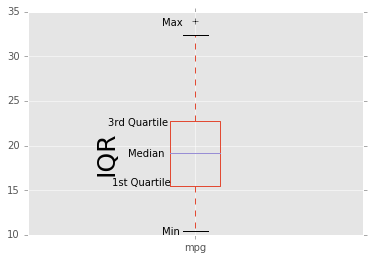

In [14]:
mtcars.boxplot(column='mpg',
               return_type='axes',
               figsize=(8,8))

plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.8, y=18.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=33.5, s="Max")
plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25)
#mtcars.boxplot?

In [15]:
#varanice 方差的意义？离散程度
mtcars['mpg'].var()

36.32410282258065

In [16]:
# standard deviation 
mtcars['mpg'].std()

6.026948052089105

# 绝对中位差
Since variance and standard deviation are both derived from the mean, they are susceptible to the influence of data skew and outliers. 

Median absolute deviation is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median:

In [17]:
med_abs_devs = abs(mtcars['mpg']-mtcars['mpg'].median())
med_abs_devs.median() * 1.4826  # 各绝对差还要取中位数；Note: The MAD is often multiplied by a scaling factor of 1.4826.

5.411490000000001

# Skewness and Kurtosis 偏度和峰态 及其可视化
* 描述性统计还包括 描述 the shape of the distribution 的衡量。偏度衡量一个分布的偏斜或不对称程度。这里不讨论计算公式，了解数值意义即可。
* pandas 内建函数

In [18]:
mtcars['mpg'].skew()

0.67237713762908047

In [19]:
mtcars['mpg'].kurt()

-0.0220062914240855

* np.random.normal
* np.concatenate
* np.random.uniform

In [20]:
#To explore these two measures further, let's create some dummy data and inspect it:

norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2,
                              np.random.exponential(size=65000)),
                              axis=0)

uniform_data = np.random.uniform(0,2,size=100000)

peaked_data = np.concatenate((np.random.exponential(size=50000),
                              np.random.exponential(size=50000)*(-1)),
                               axis=0)

data_df = pd.DataFrame({'norm':norm_data,
                        'skewed':skewed_data,
                        'uniform':uniform_data,
                        'peadked':peaked_data})

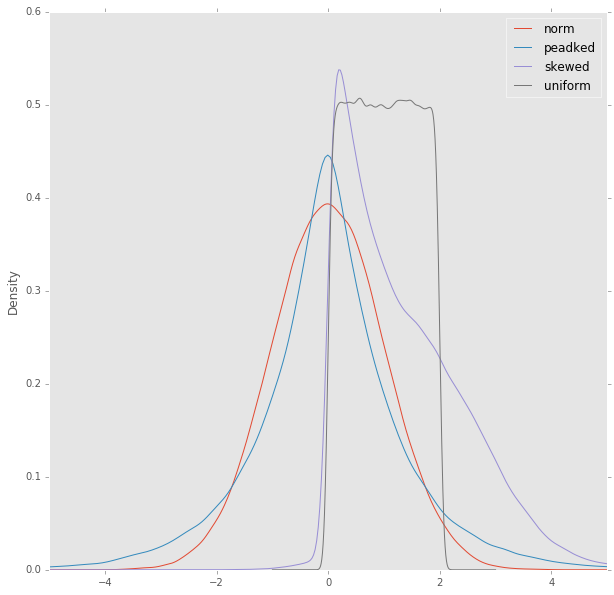

In [21]:
data_df.plot(kind='density',
             figsize=(10,10),
             xlim=(-5,5),
            grid = False)

### 偏度、峰度分析：

In [22]:
data_df.skew() 
# 我们希望分布的偏度越小越好。
#skewed 右偏：数值为正，且很大，表示不对称程度很大；其他基本对称，skew值近似为0：

norm       0.003885
peadked    0.030404
skewed     1.000914
uniform    0.001101
dtype: float64

In [23]:
data_df.kurt()
# 正态分布，值近似0；峰态分布，越尖，值为正数，不靠近0；分布均匀（uniform），feng'du为负。
#the normally distributed data has a kurtosis near zero,
#the flat distribution has negative kurtosis and 
#the two pointier distributions have positive kurtosis.

norm      -0.004108
peadked    3.034941
skewed     1.249795
uniform   -1.199452
dtype: float64

# Wrap Up
Descriptive statistics help you explore features of your data, 

like center, spread and shape by summarizing them with numerical measurements. 

Descriptive statistics help inform the direction of an analysis and 

let you communicate your insights to others quickly and succinctly. 

In addition, certain values, like the mean and variance, are used in all sorts of statistical tests and predictive 

models.